In [2]:
#Setup Environment
# using IceFloeTracker
# using DataFrames
# using Plots
# using Images
using Pkg
Pkg.add(;name="IceFloeTracker", rev="main")
Pkg.add("Images")

    Updating git-repo `https://github.com/WilhelmusLab/IceFloeTracker.jl.git`
    Updating registry at `~/.julia/registries/HolyLabRegistry`
    Updating git-repo `https://github.com/HolyLab/HolyLabRegistry.git`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed ANSIColoredPrinters ───── v0.0.1
   Installed Git_jll ───────────────── v2.51.1+0
   Installed RegistryInstances ─────── v0.1.0
   Installed Git ───────────────────── v1.5.0
   Installed ZMQ ───────────────────── v1.5.0
   Installed LazilyInitializedFields ─ v1.3.0
   Installed PrettyTables ──────────── v3.0.8
   Installed Git_LFS_jll ───────────── v3.7.0+0
   Installed IOCapture ─────────────── v0.2.5
   Installed MarkdownAST ───────────── v0.1.2
   Installed Documenter ────────────── v1.14.1
    Updating `~/Documents/research/packages/IceFloeTracker.jl/docs/Project.toml`
  [04643c7a] ~ IceFloeTracker v0.9.0 `..` ⇒ v0.9.0 `https://github.com/WilhelmusLab/IceFloeTracker.jl.

In [3]:
Pkg.add(["Dates", "DataFrames", "Plots"])

   Resolving package versions...
    Updating `~/Documents/research/packages/IceFloeTracker.jl/docs/Project.toml`
  [a93c6f00] + DataFrames v1.8.1
  [ade2ca70] + Dates v1.11.0
    Updating `~/Documents/research/packages/IceFloeTracker.jl/docs/Manifest.toml`
  [a93c6f00] ↑ DataFrames v1.8.0 ⇒ v1.8.1
Precompiling project...
  21566.6 ms  ✓ DataFrames
   1465.2 ms  ✓ Latexify → DataFramesExt
   7958.1 ms  ✓ IceFloeTracker
  3 dependencies successfully precompiled in 30 seconds. 424 already precompiled.


In [ ]:
using IceFloeTracker
using Images
# using Images: segment_mean, labels_map, SegmentedImage, RGB
# using IceFloeTracker: make_landmask_se, find_ice_labels, imsharpen_gray, normalize_image,
#                       discriminate_ice_water, segmentation_A, segmentation_B, segmentation_F,
#                       segmented_ice_cloudmasking, watershed_ice_floes, watershed_product

In [22]:
data_loader = Watkins2025GitHub(; ref="b865acc62f223d6ff14a073a297d682c4c034e5d")

Watkins2025GitHub("b865acc62f223d6ff14a073a297d682c4c034e5d", "https://github.com/danielmwatkins/ice_floe_validation_dataset/", "data/validation_dataset/validation_dataset.csv", "/tmp/Watkins2025")

In [24]:
data_loader().metadata

378×30 DataFrame
 Row │        case_number  region          start_date  center_lon  center_lat  ⋯
     │ Int64  Int64        String          Date        Float64     Float64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     0            1  baffin_bay      2022-09-11    -91.5275     77.801   ⋯
   2 │     1            1  baffin_bay      2022-09-11    -91.5275     77.801
   3 │     2            2  baffin_bay      2015-03-12    -81.9643     76.0579
   4 │     3            2  baffin_bay      2015-03-12    -81.9643     76.0579
   5 │     4            3  baffin_bay      2012-04-19    -79.5793     75.6372  ⋯
   6 │     5            3  baffin_bay      2012-04-19    -79.5793     75.6372
   7 │     6            4  baffin_bay      2019-09-25    -76.8094     79.3029
   8 │     7            4  baffin_bay      2019-09-25    -76.8094     79.3029
  ⋮  │   ⋮         ⋮             ⋮             ⋮           ⋮           ⋮       ⋱
 372 │   371          186  sea_of_okhostk  2017-05-23    155.183      59.6011  ⋯
 373 │   372          187  sea_of_okhostk  2013-04-29    155.731      59.7278
 374 │   373          187  sea_of_okhostk  2013-04-29    155.731      59.7278
 375 │   374          188  sea_of_okhostk  2015-03-12    156.838      57.6608
 376 │   375          188  sea_of_okhostk  2015-03-12    156.838      57.6608  ⋯
 377 │   376          189  sea_of_okhostk  2012-04-26    163.086      61.4172
 378 │   377          189  sea_of_okhostk  2012-04-26    163.086      61.4172
                                                 24 columns and 363 rows omitted

In [ ]:
#choose case number

┌ Warning: In /tmp/Watkins2025/a451cd5e62a10309a9640fbbe6b32a236fcebc70/validation_dataset.csv line 381 has 0 fields but 28 fields are expected. Skipping row.
└ @ TextParse /Users/dwatkin2/.julia/packages/TextParse/bX5Ws/src/csv.jl:390
┌ Warning: In /tmp/Watkins2025/a451cd5e62a10309a9640fbbe6b32a236fcebc70/validation_dataset.csv line 381 has 0 fields but 28 fields are expected. Skipping row.
└ @ TextParse /Users/dwatkin2/.julia/packages/TextParse/bX5Ws/src/csv.jl:390
┌ Warning: In /tmp/Watkins2025/a451cd5e62a10309a9640fbbe6b32a236fcebc70/validation_dataset.csv line 381 has 0 fields but 28 fields are expected. Skipping row.
└ @ TextParse /Users/dwatkin2/.julia/packages/TextParse/bX5Ws/src/csv.jl:390


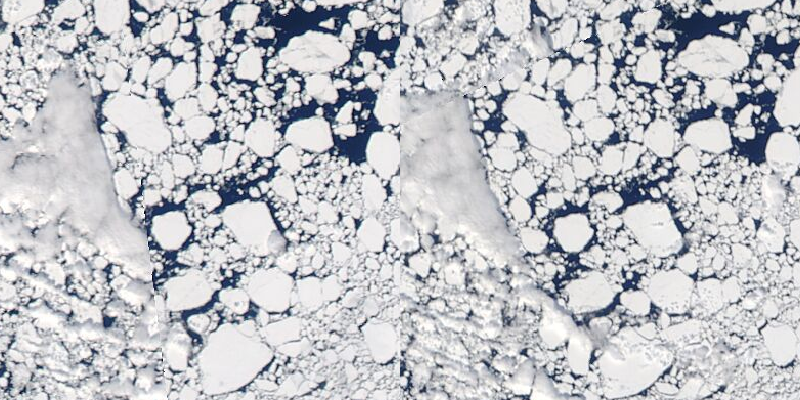

In [ ]:
cn = 6
dataset = data_loader(c-> c.case_number == cn)
case1 = first(data_loader(c-> c.case_number == cn && c.satellite == "aqua"))
case2 = first(data_loader(c-> c.case_number == cn && c.satellite == "terra"))
mosaicview(case1.modis_truecolor, case2.modis_truecolor, nrow=1)

In [13]:
truecolor1 = RGB.(case1.modis_truecolor);
truecolor2 = RGB.(case2.modis_truecolor);
falsecolor1 = RGB.(case1.modis_falsecolor);
falsecolor2 = RGB.(case2.modis_falsecolor);
landmask1 = RGB.(case1.modis_landmask); 
landmask2 = RGB.(case2.modis_landmask);

## Initialize Segmentation Algorithm
The Ice Floe Tracker includes two demonstration image preprocessing and segmentation pipelines. Each is a module with a series of functions for preprocessing images and producing a sea ice floe segmentation.  Here we'll initialize the segmentation algorithm using the LopezAcosta2019 module.

In [26]:
segmentation_algorithm = LopezAcosta2019Tiling.Segment()

IceFloeTracker.LopezAcosta2019Tiling.Segment((rblocks = 2, cblocks = 2), (prelim_threshold = 0.43137254901960786, band_7_threshold = 0.7843137254901961, band_2_threshold = 0.7450980392156863, ratio_lower = 0.0, ratio_offset = 0.0, ratio_upper = 0.75), (white_threshold = 25.5, entropy_threshold = 4, white_fraction_threshold = 0.4), (gamma = 1.5, gamma_factor = 1.3, gamma_threshold = 220), (se_disk1 = Bool[0 1 0; 1 1 1; 0 1 0], se_disk2 = Bool[0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0], se_disk4 = Bool[0 0 … 0 0; 0 1 … 1 0; … ; 0 1 … 1 0; 0 0 … 0 0]), (radius = 10, amount = 2.0, factor = 255.0), (band_7_threshold = 0.0196078431372549, band_2_threshold = 0.9019607843137255, band_1_threshold = 0.9411764705882353, band_7_threshold_relaxed = 0.0392156862745098, band_1_threshold_relaxed = 0.7450980392156863, possible_ice_threshold = 0.29411764705882354, k = 3), (radius = 10, amount = 2, factor = 0.5), 0.1)

In [27]:
segments1 = segmentation_algorithm(truecolor1, falsecolor1, landmask1);
segments2 = segmentation_algorithm(truecolor2, falsecolor2, landmask2);

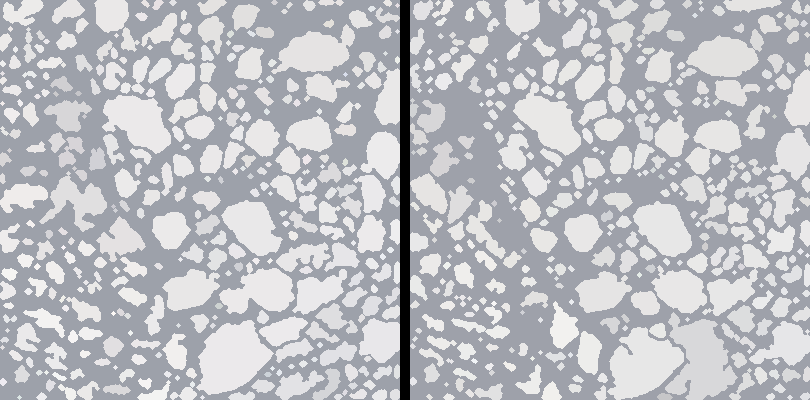

In [33]:
function view_seg(s)
    map(i->segment_mean(s,i), labels_map(s))
end

mosaicview(view_seg(segments1), view_seg(segments2), nrow=1, npad=10)

# Tracking Section
Next, we'll track the ice floes. To do that we need to generate property tables with information on each floe.

In [296]:
# Functions for prepping the region props tables, and tracking floes
using IceFloeTracker: addfloemasks!, adduuid!, add_passtimes!, addψs!, long_tracker


In [ ]:
using DataFrames, Dates, Plots

In [ ]:
#Measuring object properties

In [34]:
props = regionprops_table.([segments1.image_indexmap, segments2.image_indexmap]);

In [35]:
props[1]

337×12 DataFrame
 Row │ area     min_row  min_col  max_row  max_col  row_centroid  col_centroid ⋯
     │ Float64  Int64    Int64    Int64    Int64    Int64         Int64        ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   147.0       34        1       52       12            42             5 ⋯
   2 │    27.0       61        1       67        6            64             3
   3 │    13.0       72        1       76        5            74             3
   4 │    37.0       78        1       85        7            81             4
   5 │    13.0      102        1      106        5           104             3 ⋯
   6 │    38.0      127        1      136        9           132             5
   7 │   104.0      153        1      167       12           160             5
   8 │    46.0      174        1      184        6           179             3
  ⋮  │    ⋮        ⋮        ⋮        ⋮        ⋮          ⋮             ⋮       ⋱
 331 │    94.0      390      391      400      400           395           396 ⋯
 332 │   123.0      177      392      195      400           186           397
 333 │   123.0      262      394      284      400           273           398
 334 │    74.0      365      395      379      400           372           398
 335 │    13.0        4      396        8      400             6           398 ⋯
 336 │    13.0       30      396       34      400            32           398
 337 │    28.0       57      396       64      400            61           398
                                                  5 columns and 322 rows omitted

In [46]:
passtimes = collect(Date(2022,5,30):Day(1):Date(2022,5,31)) #add code to connect this with data set from segmentaion?
add_passtimes!(props, passtimes)

In [47]:
adduuid!(props);

In [49]:
addfloemasks!(props, [segments1.image_indexmap .> 0, segments2.image_indexmap .> 0]) # Images need to be bitmatrices for the floemasks call.
addψs!(props)

In [50]:
props[1][!, :bdry] = IceFloeTracker.bwtraceboundary.(props[1][!, :mask]);
props[2][!, :bdry] = IceFloeTracker.bwtraceboundary.(props[2][!, :mask]);

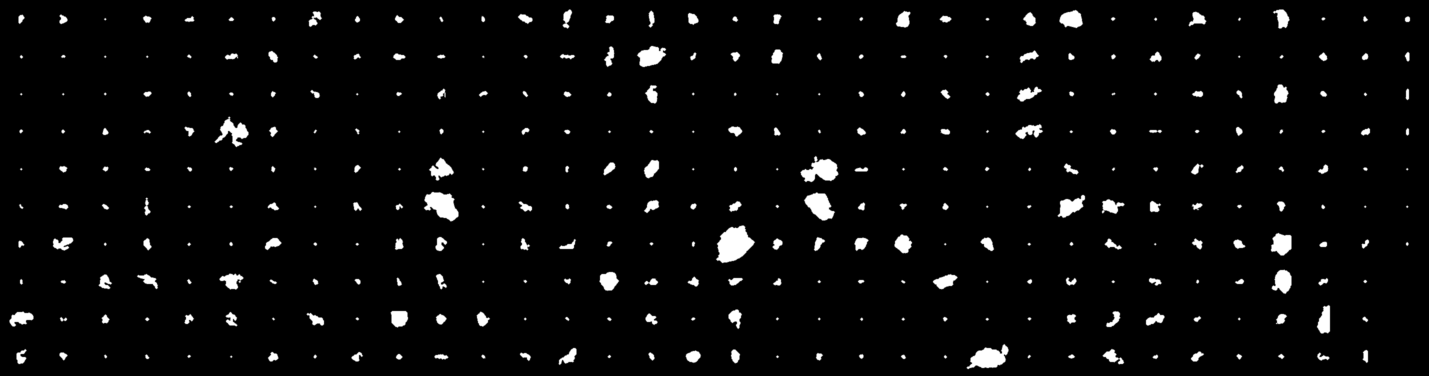

In [ ]:
# potentially add a subset() here to show only a sample.
mosaicview([Gray.(m) for m in props[1].mask], nrow=10)

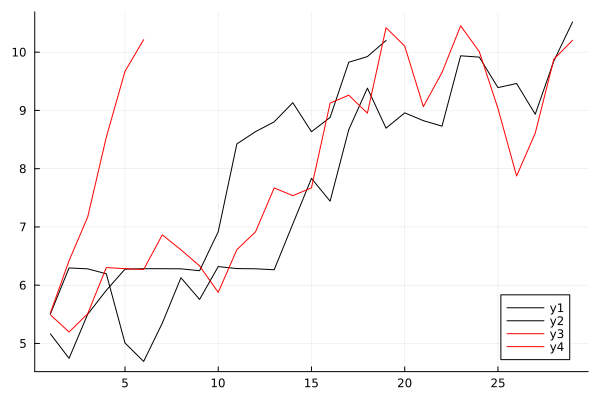

In [ ]:
# find the larger floes to show so it's more informative

plt = plot([p[1,:psi] for p in props], lc=:black)
plot!([p[2,:psi] for p in props], lc=:red)

In [ ]:
#Tracking

In [248]:
display("text/markdown", @doc long_tracker)

```
long_tracker(props, condition_thresholds, mc_thresholds)
```

Track ice floes over multiple observations.

Trajectories are built as follows:

  * Assume the floes detected in observation 1 are trajectories of length 1.
  * For each subsequent observation:

      * Determine the latest observation for each trajectory – these are the "current trajectory heads".
      * Find matches between the the current trajectory heads and the new observed floes, extending those trajectories.
      * Any unmatched floe in an observation is added as a new trajectory starting point.

# Arguments

  * `props::Vector{DataFrame}`: A vector of DataFrames, each containing ice floe properties for a single day. Each DataFrame must have the following columns:

      * "area"
      * "min_row"
      * "min_col"
      * "max_row"
      * "max_col"
      * "row_centroid"
      * "col_centroid"
      * "convex_area"
      * "major*axis*length"
      * "minor*axis*length"
      * "orientation"
      * "perimeter"
      * "mask": 2D array of booleans
      * "passtime": A timestamp for the floe
      * "psi": the psi-s curve for the floe
      * "uuid": a universally unique identifier for each segmented floe
  * `condition_thresholds`: namedtuple of thresholds for deciding whether to match floe `i` from day `k` to floe j from day `k+1`. See `IceFloeTracker.condition_thresholds` for sample values.
  * `mc_thresholds`: thresholds for area mismatch and psi-s shape correlation. See `IceFloeTracker.mc_thresholds` for sample values.

# Returns

A DataFrame with the above columns, plus extra columns:

  * `area_mismatch` and `corr`, which are the area mismatch and correlation between a floe and the one that preceeds it in the trajectory.
  * `head_uuid`, the floe which was best matched by this floe.
  * Trajectories are identified by: 

      * a unique identifier `ID` and the
      * UUID of the trajectory, `trajectory_uuid`.


In [58]:
ct = IceFloeTracker.candidate_filter_settings
mc = IceFloeTracker.candidate_matching_settings

(goodness = (small_floe_area = 0.18, large_floe_area = 0.236, corr = 0.68), comp = (mxrot = 10, sz = 16))

In [59]:
tracked = long_tracker(props, ct, mc);

┌ Warning: correlation too low, c: 0.9182860468101136
└ @ IceFloeTracker.Tracking /Users/dwatkin2/.julia/packages/IceFloeTracker/gjHo8/src/Tracking/matchcorr.jl:50
┌ Warning: correlation too low, c: 0.9075357507100561
└ @ IceFloeTracker.Tracking /Users/dwatkin2/.julia/packages/IceFloeTracker/gjHo8/src/Tracking/matchcorr.jl:50
┌ Warning: correlation too low, c: 0.9026828251413621
└ @ IceFloeTracker.Tracking /Users/dwatkin2/.julia/packages/IceFloeTracker/gjHo8/src/Tracking/matchcorr.jl:50
┌ Warning: correlation too low, c: 0.9253627529379153
└ @ IceFloeTracker.Tracking /Users/dwatkin2/.julia/packages/IceFloeTracker/gjHo8/src/Tracking/matchcorr.jl:50
┌ Warning: correlation too low, c: 0.9408177000459347
└ @ IceFloeTracker.Tracking /Users/dwatkin2/.julia/packages/IceFloeTracker/gjHo8/src/Tracking/matchcorr.jl:50
┌ Warning: correlation too low, c: 0.9121539506750678
└ @ IceFloeTracker.Tracking /Users/dwatkin2/.julia/packages/IceFloeTracker/gjHo8/src/Tracking/matchcorr.jl:50
┌ Warning: corre

In [61]:
nrow(tracked)

50

In [63]:
tg = groupby(tracked, :ID);

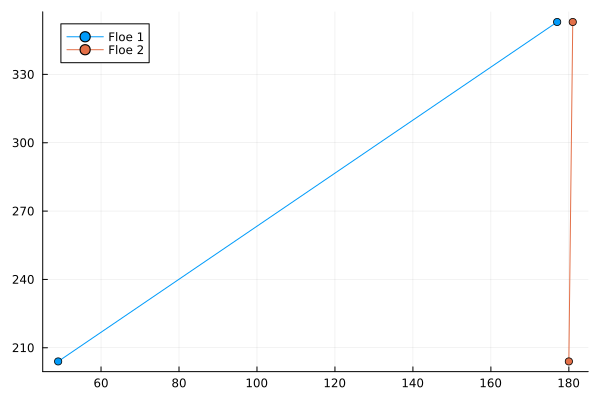

In [64]:
plot(tg[1][!, :col_centroid], tg[1][!, :row_centroid], m=:circle, markersize=4, label="Floe 1")
plot!(tg[2][!, :col_centroid], tg[1][!, :row_centroid], m=:circle, markersize=4, label="Floe 2")

In [318]:
# force Jupyter to use PNG to speed up plotting
CairoMakie.enable_only_mime!("png")

In [67]:
Pkg.add("CairoMakie")
using CairoMakie

   Resolving package versions...
   Installed Git_jll ─────────────── v2.51.3+0
   Installed GR_jll ──────────────── v0.73.18+0
   Installed PDMats ──────────────── v0.11.36
   Installed StatsFuns ───────────── v1.5.2
   Installed Measures ────────────── v0.3.3
   Installed GEOS_jll ────────────── v3.14.1+0
   Installed Rmath ───────────────── v0.9.0
   Installed OpenSSH_jll ─────────── v10.2.1+0
   Installed MathTeXEngine ───────── v0.6.7
   Installed GR ──────────────────── v0.73.18
   Installed DelaunayTriangulation ─ v1.6.5
    Updating `~/Documents/research/packages/IceFloeTracker.jl/docs/Project.toml`
  [13f3f980] + CairoMakie v0.15.6
    Updating `~/Documents/research/packages/IceFloeTracker.jl/docs/Manifest.toml`
  [79e6a3ab] ↑ Adapt v4.3.0 ⇒ v4.4.0
  [35492f91] + AdaptivePredicates v1.2.0
  [27a7e980] + Animations v0.4.2
  [4fba245c] ↑ ArrayInterface v7.20.0 ⇒ v7.22.0
  [67c07d97] + Automa v1.1.0
  [18cc8868] + BaseDirs v1.3.2
  [96374032] + CRlibm v1.0.2
  [159f3aea] + Cairo 

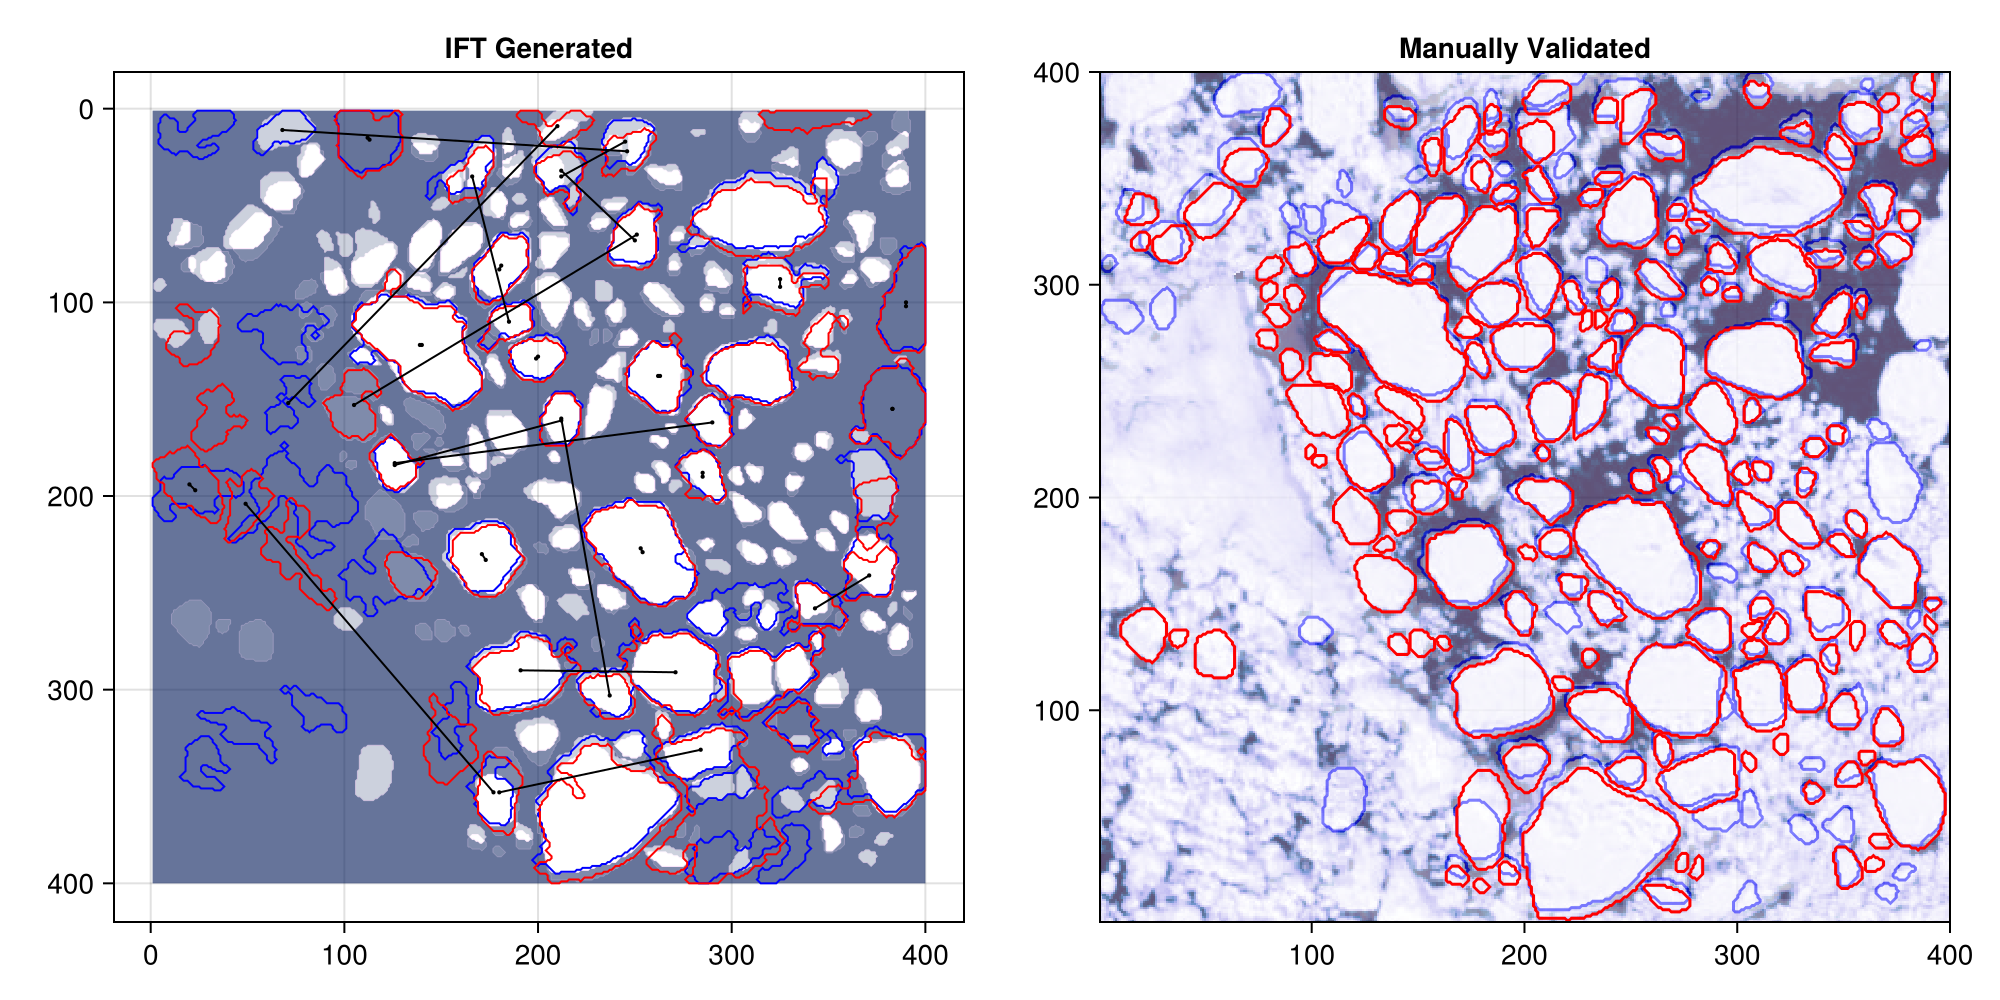

CairoMakie.Screen{IMAGE}


In [70]:
# Grab a case to plot. In this case aqua is case 2, that won't always be the case, so 
# check each time.
terra = case1
aqua = case2;

# color options: https://docs.makie.org/dev/explanations/colors

# Initialize figure object
f = Figure(size=(1000, 500))

# Add two panels and give them titles
ax1 = CairoMakie.Axis(f[1, 1], aspect = 1, title="IFT Generated")
ax2 = CairoMakie.Axis(f[1, 2], aspect = 1, title="Manually Validated")
   
#IFT generated tracked image
idx = tracked.trajectory_uuid[1]
track_data = filter(r -> r.trajectory_uuid == idx, tracked);

ax1.yreversed = true
floes = terra.validated_binary_floes .> 0
CairoMakie.contourf!(ax1, rotr90(reverse(floes, dims=1)), levels = 0:0.5:1, colormap=(:batlow, 0.5))   
floes = aqua.validated_binary_floes .> 0
CairoMakie.contourf!(ax1, rotr90(reverse(floes, dims=1)), levels = 0:0.5:1, colormap=(:batlow, 0.2))   
for (props_df, color) in zip(props, [:blue, :red])
    for floe_data in eachrow(props_df)
        floe = floe_data.bdry
        rc = floe_data.min_row - 1
        cc = floe_data.min_col - 1
        lines!(ax1, getindex.(floe[1], 2) .+ cc, getindex.(floe[1], 1) .+ rc, color=color, linewidth=1)
    end
end
for traj_id in unique(tracked.trajectory_uuid)
    traj_data = filter(r -> r.trajectory_uuid == traj_id, tracked);
    scatterlines!(ax1, traj_data.col_centroid, traj_data.row_centroid, marker=:circle, markersize=3, color=:black, linewidth=1)
end
CairoMakie.ylims!(400, 0.5)
CairoMakie.xlims!(0.5, 400)

# Plot the Terra data. First, we get the binary floes as a bitmatrix
floes = terra.validated_binary_floes .> 0

# Then we plot the image using the "heatmap" function. Here I'm using Band 2 which has
# high contrast between water and ice.
CairoMakie.heatmap!(ax2, rotr90(green.(terra.modis_falsecolor)), 
        colormap=(:devon, 0.5), colorrange=(0, 1))

# Now we draw the Terra floe outlines using a contour plot. This method draws lines at
# places where the image gradient is large. In a binary image, it's all 0 or 1, so using
# levels = 0, 0.5, 1 forces it to draw lines along the edges of bright spots.
CairoMakie.contour!(ax2, rotr90(floes), color = :blue, levels = 0:0.5:1)   

# Now do the same for the Aqua images
floes = aqua.validated_binary_floes .> 0
CairoMakie.heatmap!(ax2, rotr90(green.(aqua.modis_falsecolor)),  
        colormap=(:devon, 0.5), colorrange=(0, 1))
CairoMakie.contour!(ax2, rotr90(floes), color = :red, levels = 0:0.5:1)

ax2.yreversed = false

# Finally we show the figure.
# We could also save it with the command save("image_name.png", f)
display(f)